<a href="https://colab.research.google.com/github/ArovaSyams/ML_k-nearest_neighbors/blob/main/K_nears_neighborn_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.plotting import plot_decision_regions
import time
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV

Generate Dataset

In [ ]:
inputs, targets = make_blobs(n_samples=1000, random_state=365, centers=[(-3, 3), (0, 0), (2, 2)])
inputs

array([[ 1.63046017,  2.09402946],
       [-2.81125197,  3.85224116],
       [ 0.50105079,  1.58253051],
       ...,
       [-0.58897444,  0.31771066],
       [-2.3285928 ,  4.95748895],
       [-0.40093516, -0.18595288]])

In [ ]:
inputs.shape, targets.shape

((1000, 2), (1000,))

In [ ]:
data = pd.DataFrame(data=inputs, columns=["Feature 1", "Feature 2"])
data["Target"] = targets

Plotting dataset

In [ ]:
colors = sns.color_palette(["#000C1F", "#29757A", "#FF5050"])
colors

[(0.0, 0.047058823529411764, 0.12156862745098039),
 (0.1607843137254902, 0.4588235294117647, 0.47843137254901963),
 (1.0, 0.3137254901960784, 0.3137254901960784)]

<Axes: xlabel='Feature 1', ylabel='Feature 2'>

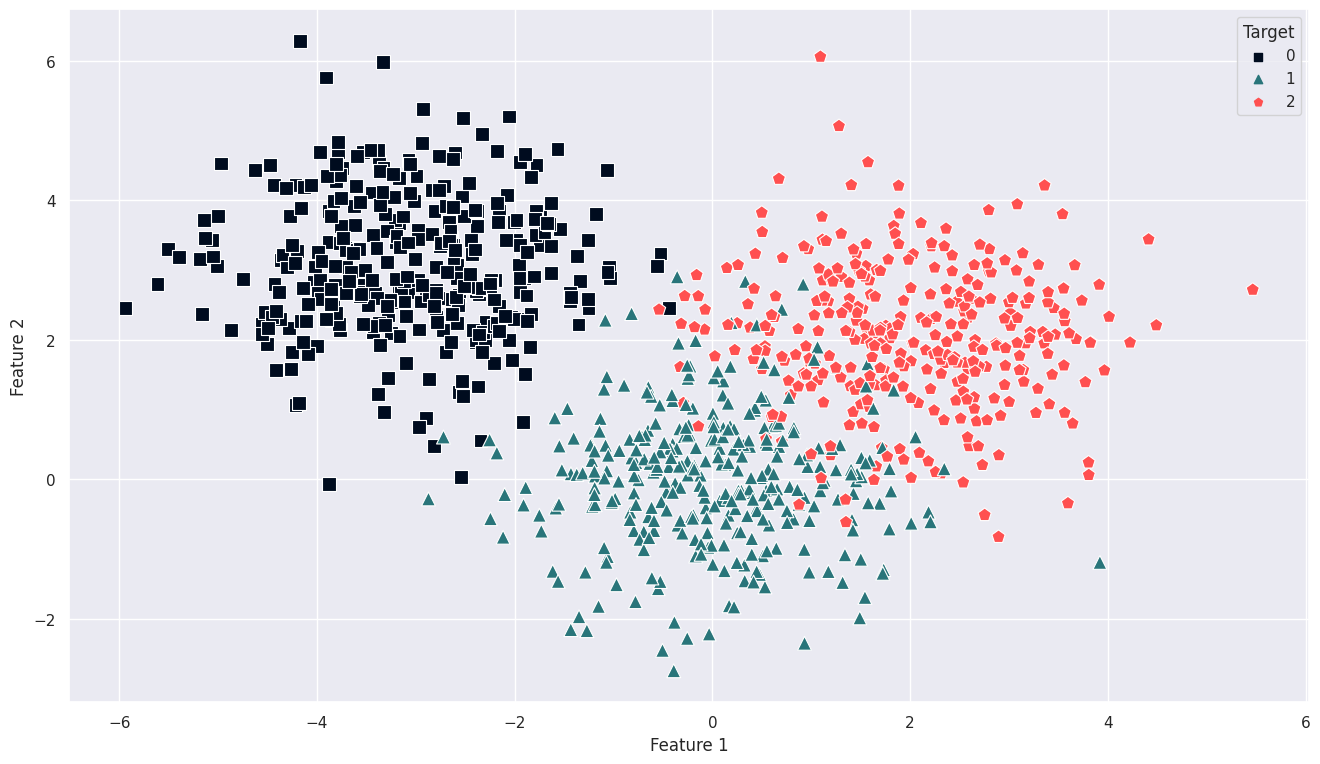

In [ ]:
sns.set()
plt.figure(figsize=(16, 9))

sns.scatterplot(x="Feature 1", y="Feature 2",
                data=data,
                hue="Target", palette=colors,
                style="Target",
                markers=[",", "^", "p"],
                s=100)

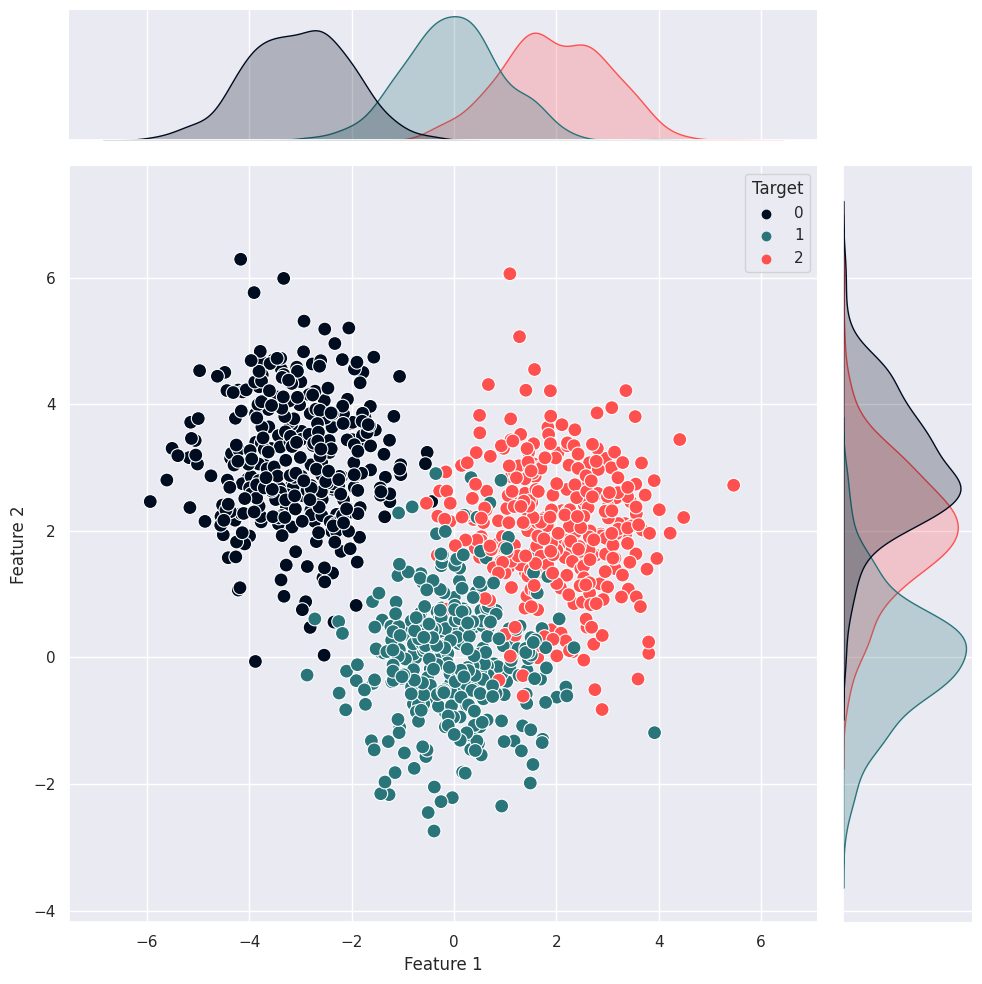

In [ ]:
sns.set()

sns.jointplot(x="Feature 1", y="Feature 2",
              data=data,
              hue="Target",
              palette=colors,
              height=10,
              s=100,
              legend=True)

Create train split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.2, random_state=365, stratify=targets)

### Create Model

In [ ]:
# weight have "uniform", "distance"
clf = KNeighborsClassifier(n_neighbors=10, weights="uniform")

clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

### Predict a sample

In [ ]:
feature_1 = -0.18
feature_2 = 3.3

In [ ]:
clf.predict([[feature_1, feature_2]])

array([2])

In [ ]:
neighbors = clf.kneighbors([[feature_1, feature_2]])
neighbors

(array([[0.350609  , 0.37066943, 0.44845366, 0.49358531, 0.61721835,
         0.67352976, 0.67873275, 0.68923276, 0.7269806 , 0.85773089]]),
 array([[215, 336, 679, 221, 269, 690, 688, 309, 543, 561]]))

### Visuallize the neighbors

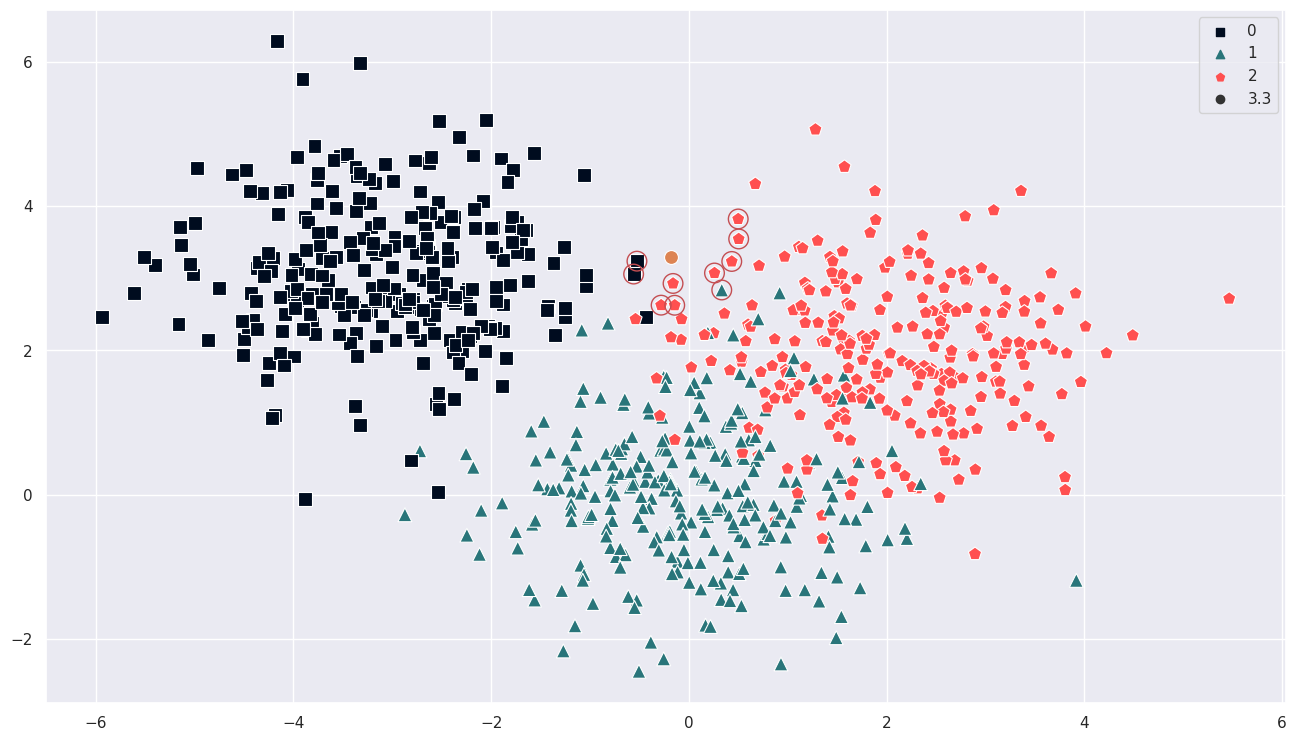

In [ ]:
sns.set()
plt.figure(figsize=(16, 9))

# make scatter from train dataset
sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1],
                hue=y_train, palette=colors,
                style=y_train,
                markers=[",", "^", "p"],
                s=100,
                legend=True)

# make scatter from sample
sns.scatterplot(x=[feature_1], y=[feature_2],
                style=feature_2,
                markers=["o"],
                s=100,
                legend=True)

# combine 2 plots
plot_x_train = []
plot_y_train = []

# find nearest neghbors
for i in neighbors[1]:
    plot_x_train.append(X_train[i, 0])
    plot_y_train.append(X_train[i, 1])

plt.scatter(plot_x_train, plot_y_train, s=200, facecolors="none", edgecolors="r")


### Getting parameter of the model

In [ ]:
clf.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 10,
 'p': 2,
 'weights': 'uniform'}

### Drawing decision regions

Time elapsed: 105.6 seconds


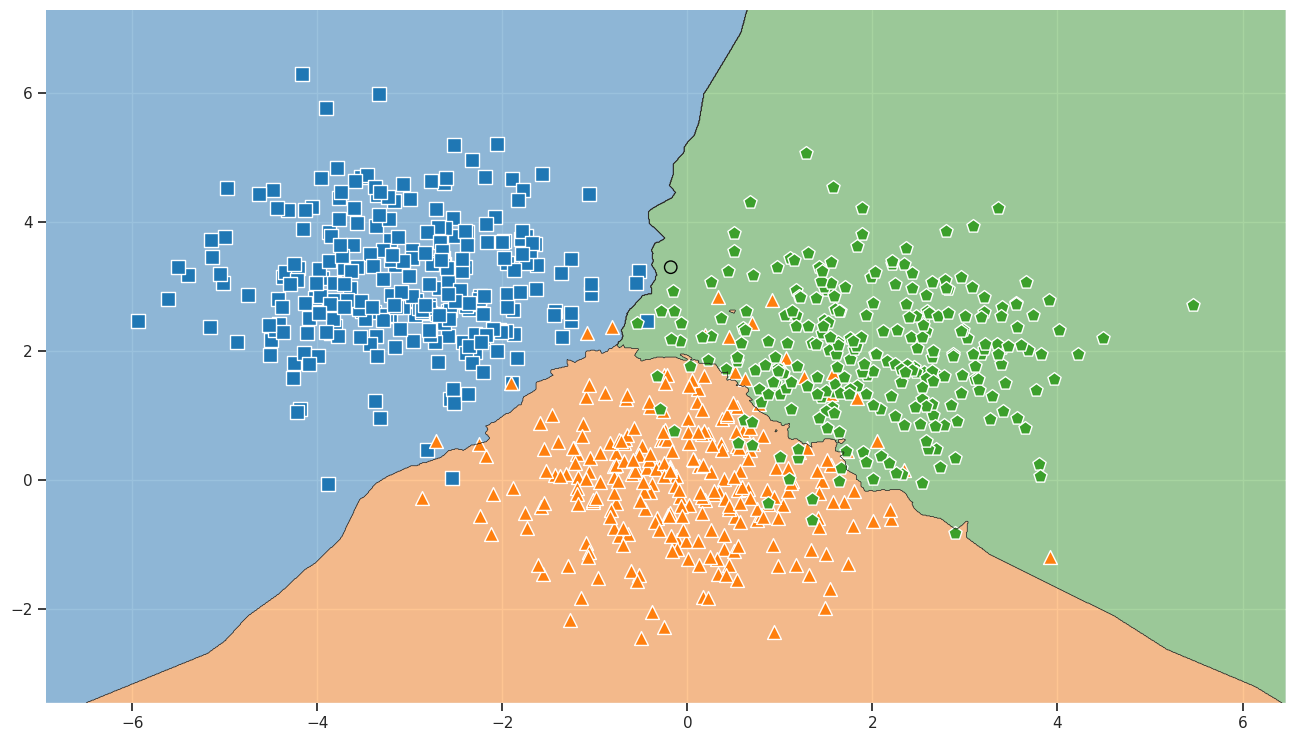

In [ ]:
# make time pred
start = time.time()

plt.figure(figsize=(16, 9))

plot_decision_regions(X=X_train,
                      y=y_train,
                      X_highlight=np.array([[feature_1, feature_2]]),
                      clf=clf,
                      markers=[",", "^", "p"],
                    #   colors="#000C1F, #29757A, #FF5050",
                      scatter_kwargs={"s":100, "edgecolor": "white", "alpha": 1},
                      legend=0)

end = time.time()

print(f"Time elapsed: {round(end-start, 1)} seconds")

## Getting error rates of a set of models

In [ ]:
error_uniform = []
error_distance = []

k_range = range(1, 51)

for k in k_range:

    # KNN with uniform
    clf = KNeighborsClassifier(n_neighbors=k, weights="uniform")
    clf.fit(X_train, y_train)

    prediction = clf.predict(X_test)
    error_uniform.append(1 - accuracy_score(y_test, prediction))

    # KNN with distance
    clf = KNeighborsClassifier(n_neighbors=k, weights="distance")
    clf.fit(X_train, y_train)

    prediction = clf.predict(X_test)
    error_distance.append(1 - accuracy_score(y_test, prediction))

## Plotting the error rates as a function of the number of region

Text(0, 0.5, 'Error rate')

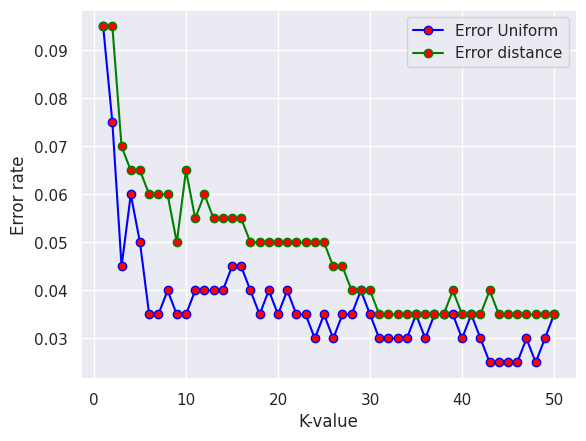

In [ ]:
plt.plot(k_range, error_uniform, c="blue", linestyle="solid", marker="o", markerfacecolor="red", label="Error Uniform")

plt.plot(k_range, error_distance, c="green", linestyle="solid", marker="o", markerfacecolor="red", label="Error distance")

plt.legend()

plt.xlabel("K-value")
plt.ylabel("Error rate")

## Choosing a set of parameters to test

In [ ]:
parameters = {"n_neighbors": range(1, 51), "weights": ["uniform", "distance"]}

## Create an instance of the gridsearchCV class

In [ ]:
grid_search = GridSearchCV(estimator=KNeighborsClassifier(),
                           param_grid=parameters,
                           scoring="accuracy")

In [ ]:
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 51),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [ ]:
grid_search.best_params_

{'n_neighbors': 10, 'weights': 'uniform'}

In [ ]:
best_estimator = grid_search.best_estimator_
best_estimator

KNeighborsClassifier(n_neighbors=10)

In [ ]:
grid_search.best_score_

0.9512499999999999

## Make prediction on the test dataset

In [ ]:
y_test_pred = clf.predict(X_test)

## Construction Confusion matrix

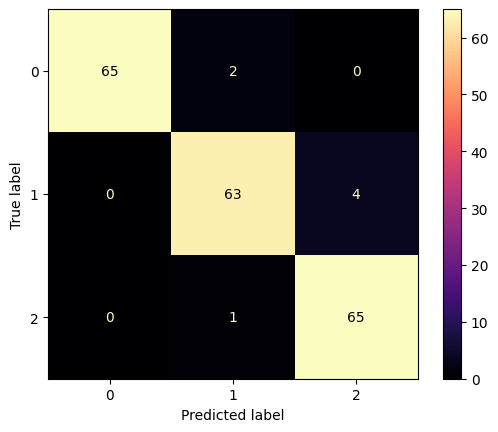

In [ ]:
sns.reset_orig()

ConfusionMatrixDisplay.from_predictions(
    y_test, y_test_pred,
    labels=clf.classes_,
    cmap="magma"
)

## clasification report

In [ ]:
print(classification_report(y_test, y_test_pred, target_names=["0", "1", "2"]))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        67
           1       0.95      0.94      0.95        67
           2       0.94      0.98      0.96        66

    accuracy                           0.96       200
   macro avg       0.97      0.97      0.97       200
weighted avg       0.97      0.96      0.97       200

